<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [21]:

df = pd.read_csv('../csvs/diabetes.csv')

In [22]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [23]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})

In [24]:
missing_percent
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

In [25]:
missingno.heatmap(df)

NameError: name 'missingno' is not defined

<Axes: xlabel='Pregnancies'>

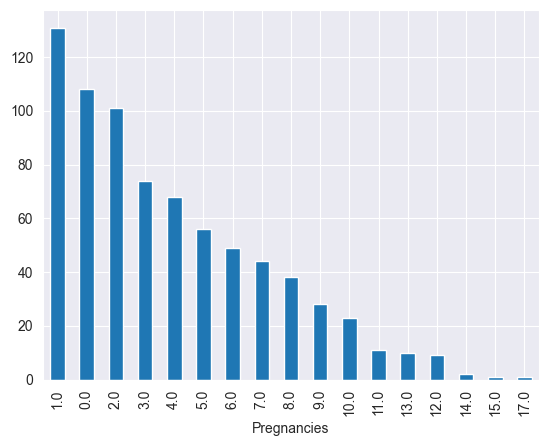

In [26]:
df['Pregnancies'].value_counts().plot.bar()

## <font color = 'Orange'>Handle the missing values</font>

In [27]:
df.BMI = df.BMI.fillna(df.BMI.mean())
mice = IterativeImputer()
imputed_values = mice.fit_transform(df[['Pregnancies','SkinThickness']])
df[['Pregnancies','SkinThickness']] = imputed_values

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [28]:
df.to_csv('diabetes_fixed.csv')

Print the first rows of your final Dataset

In [29]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [30]:
scaler = MinMaxScaler()
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = scaler.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X, Y = df.drop(columns=['Outcome']), df['Outcome']
X_Train, X_test, Y_Train, Y_test = train_test_split(X,Y,test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_Train, Y_Train)

KNeighborsClassifier(n_neighbors=7)

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [32]:
Y_pred = knn.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [33]:
scores = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_Train, Y_Train)
    preds = knn.predict(X_test)
    sc = f1_score(preds, Y_test)
    scores.append(sc)

In [34]:
print(classification_report(Y_test,Y_pred))
score = f1_score(Y_pred,Y_test,average='macro')
print(score)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       107
           1       0.56      0.49      0.52        47

    accuracy                           0.73       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.72      0.73      0.72       154

0.6659090909090909
